In [1]:
import pyanitools as pyt
import pyaniasetools as aat
import hdnntools as hdt
import numpy as np

In [2]:
#----------------Parameters--------------------
mol = '/home/jujuman/Research/water/data.dat'
mol2 = '/home/jujuman/Research/water/data_mp2.dat'
wkdir = '/home/jujuman/Research/DataReductionMethods/model6r/model-gdb_r06_comb09_1/cv4/'
cnstfile = wkdir + 'rHCNO-4.6A_16-3.1A_a4-8.params'
saefile  = wkdir + 'sae_6-31gd.dat'
nnfdir   = wkdir + '/train'
Nn = 5
#----------------------------------------------

In [3]:
# Define the conformer cross validator class
anicv = aat.anicrossvalidationconformer(cnstfile,saefile,nnfdir,Nn,0,False)

In [4]:
data = hdt.readncdatall(mol)
data2 = hdt.readncdatall(mol2)

In [5]:
# Extract the data
X  = data['coordinates']
S  = data['species']
Edft = hdt.hatokcal*data['energies']
Emp2 = hdt.hatokcal*data2['energies']
Fdft = hdt.hatokcal*data['forces']#/(0.52917724900001*0.52917724900001)

# Calculate std. dev. per atom for all conformers
sigma = anicv.compute_stddev_conformations(X, S)

# Calculate energy deltas
Eani, Fani = anicv.compute_energy_conformations(X, S)
Eani = np.mean(Eani,axis=0)

In [6]:
print(sigma)

[ 8.50902172  1.0642492   3.14906142]


In [7]:
print(Eani)
print(Edft)
print(np.abs(Eani-Edft))

[-95836.11346909 -95859.17805701 -95827.86060603]
[-95814.68091299 -95855.77652945 -95837.73236477]
[ 21.4325561    3.40152756   9.87175875]


In [8]:
import matplotlib.pyplot as plt

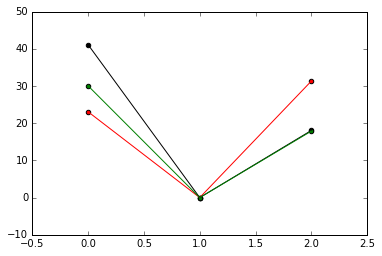

In [9]:
#Eani = -0.5*(Eani)
#Edft = -0.5*(Edft)
#Emp2 = -0.5*(Emp2)

Eani = Eani - Eani.min()
Edft = Edft - Edft.min()
Emp2 = Emp2 - Emp2.min()

plt.scatter(np.arange(Eani.size),Eani,c='r')
plt.plot(np.arange(Eani.size),Eani,c='r')
plt.scatter(np.arange(Edft.size),Edft,c='black')
plt.plot(np.arange(Edft.size),Edft,c='black')
plt.scatter(np.arange(Emp2.size),Emp2,c='green')
plt.plot(np.arange(Emp2.size),Emp2,c='green')
plt.show()